In [213]:
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [214]:
data = pd.read_csv('data.csv', parse_dates=['Intake-DateTime', 'Outcome-DateTime'])
data.dtypes

AnimalID                         object
ID                               object
Breed                            object
Color                            object
Gender                           object
Name                             object
Intake-DateTime          datetime64[ns]
Intake-Type                      object
Intake-Condition                 object
Intake-Age(days)                  int64
Date-Of-Birth                    object
Outcome-DateTime         datetime64[ns]
Outcome-Type                     object
Outcome-Subtype                  object
Outcome-Age(days)                 int64
Age                              object
IsAdopted                          bool
Category                         object
Intelligence-Ranking              int64
Intelligence-Category            object
Size-Category                    object
Longevity                       float64
Total-Cost($)                     int64
Purchase-Cost($)                  int64
Food-Cost($)                      int64


In [215]:
adoption = data[data['IsAdopted'] == True]
adoption

,AnimalID,ID,Breed,Color,Gender,Name,Intake-DateTime,Intake-Type,Intake-Condition,Intake-Age(days),...,IsAdopted,Category,Intelligence-Ranking,Intelligence-Category,Size-Category,Longevity,Total-Cost($),Purchase-Cost($),Food-Cost($),Cost-Category
7,A200922,A200922,Dachshund,Black,Male,Carlos,2013-10-03 15:47:00,Owner Surrender,Normal,12190,...,True,Hound,49,Average,Small,12.63,17350,423,3517,Saver
13,A226069,A226069,Labrador Retriever,Sable,Male,Cedar,2015-10-06 12:29:00,Stray,Normal,11825,...,True,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
28,A274546,A274546,Pointer,Tricolor,Female,Sophie,2013-11-13 18:16:00,Stray,Normal,1365,...,True,Sporting,43,Average,Large,12.42,21049,294,7565,High-End
32,A281542,A281542,Labrador Retriever,Black,Male,George,2013-12-23 13:23:00,Owner Surrender,Normal,1730,...,True,Sporting,7,Brightest,Medium,12.04,18422,810,4819,Budget
45,A302820,A302820,German Shepherd,Brown,Female,*Ladybug,2014-02-27 14:17:00,Owner Surrender,Normal,3650,...,True,Herding,3,Brightest,Large,9.73,15091,820,3895,Saver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85780,A893211,A893211,Chow Chow,Cream,Female,Chowbella,2023-11-17 10:13:00,Owner Surrender,Normal,1365,...,True,Non-Sporting,77,Low,Medium,9.01,13745,515,3606,Mid-Price
85782,A893223,A893223,Maltese,White,Male,Unknown,2023-11-17 12:13:00,Stray,Normal,60,...,True,Toy,59,Fair,Small,12.25,16073,650,2410,Saver
85784,A893286,A893286,Pug,Fawn,Female,Unknown,2023-11-18 14:06:00,Stray,Normal,30,...,True,Toy,57,Fair,Medium,11.00,15421,469,3246,Saver
85785,A893287,A893287,Pug,Fawn,Female,Brisket,2023-11-18 14:06:00,Stray,Normal,30,...,True,Toy,57,Fair,Medium,11.00,15421,469,3246,Saver


# Adoption Trends

### Popular months

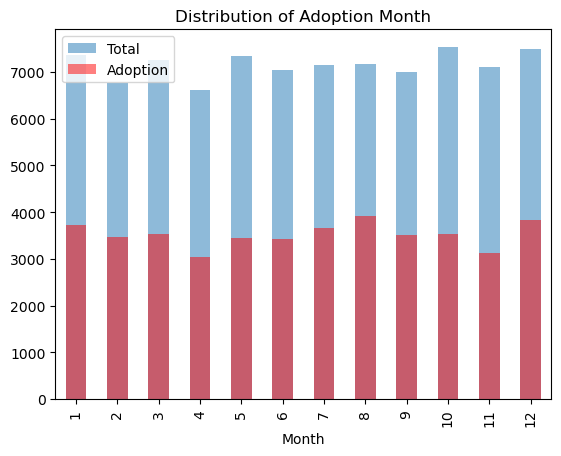

In [433]:
# Extract month from outcome-datetime
months = data['Outcome-DateTime'].dt.month.value_counts().reset_index()
months.columns = ['Month', 'Counts']
adoption_months = adoption['Outcome-DateTime'].dt.month.value_counts().reset_index()
adoption_months.columns = ['Month', 'Counts']

months = months.sort_values(by=['Month']).reset_index(drop=True)
adoption_months = adoption_months.sort_values(by=['Month']).reset_index(drop=True)

ax = months.plot(x='Month', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5) 
adoption_months.plot(ax=ax, x='Month', y='Counts', kind='bar', legend=True, color='red', label='Adoption',alpha=0.5)
plt.title('Distribution of Adoption Month')
plt.show()

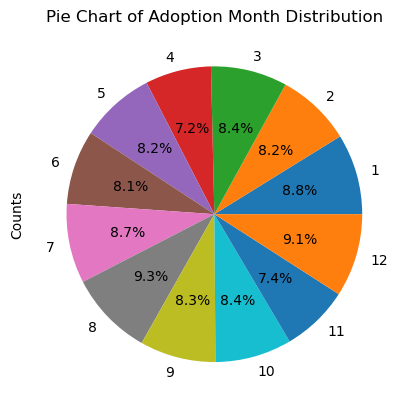

In [435]:
adoption_months.plot(x='Month', y='Counts', kind='pie', autopct='%1.1f%%', labels=adoption_months['Month'], legend=False)
plt.title('Pie Chart of Adoption Month Distribution')
plt.show()

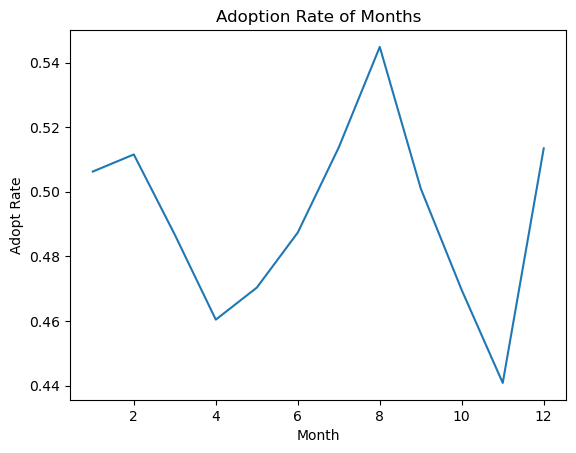

In [436]:
months['Adopt-Rate'] = adoption_months['Counts'] / months['Counts']

fig, ax = plt.subplots()
ax.plot(months['Month'], months['Adopt-Rate'])
plt.xlabel('Month')
plt.ylabel('Adopt Rate')
plt.title('Adoption Rate of Months')
plt.show()

### Adoption yearly trend

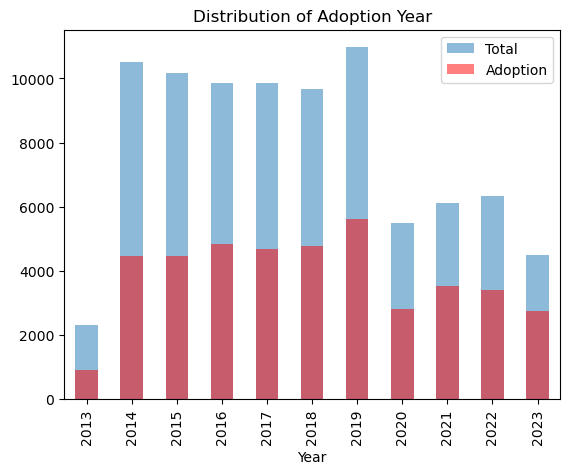

In [438]:
# Extract month from outcome-datetime
years = data['Outcome-DateTime'].dt.year.value_counts().reset_index()
years.columns = ['Year', 'Counts']
adoption_years = adoption['Outcome-DateTime'].dt.year.value_counts().reset_index()
adoption_years.columns = ['Year', 'Counts']

years = years.sort_values(by=['Year']).reset_index(drop=True)
adoption_years = adoption_years.sort_values(by=['Year']).reset_index(drop=True)

ax = years.plot(x='Year', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5) 
adoption_years.plot(ax=ax, x='Year', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Adoption Year')
plt.show()

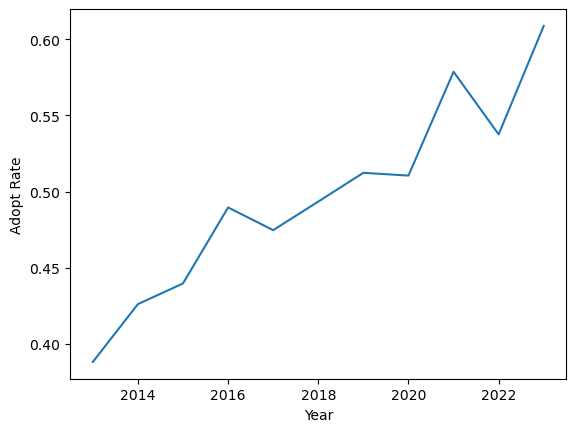

In [407]:
years['Adopt-Rate'] = adoption_years['Counts'] / years['Counts']

fig, ax = plt.subplots()
ax.plot(years['Year'], years['Adopt-Rate'])
plt.xlabel('Year')
plt.ylabel('Adopt Rate')
plt.show()

### Adoption breed trend

In [333]:
def plotBreed(breed_name):
    ast = data[data['Breed'] == breed_name]
    ast = ast['Outcome-DateTime'].dt.year.value_counts().reset_index()
    ast = ast.sort_values(by=['Outcome-DateTime']).reset_index(drop=True)
    
    adoption_ast = adoption[adoption['Breed'] == breed_name]
    adoption_ast = adoption_ast['Outcome-DateTime'].dt.year.value_counts().reset_index()
    adoption_ast = adoption_ast.sort_values(by=['Outcome-DateTime']).reset_index(drop=True)

    plt.plot(ast['Outcome-DateTime'], adoption_ast['count']/ast['count'])

In [408]:
def compareBreeds(breeds):
    for breed_name in breeds:
        plotBreed(breed_name)
        plt.legend(breeds)
        plt.xlabel('Year')
        plt.ylabel('Adopt Rate')

In [354]:
def plotBreedProp(breed_name):
    ast = data[data['Breed'] == breed_name]
    ast = ast['Outcome-DateTime'].dt.year.value_counts().reset_index()
    ast = ast.sort_values(by=['Outcome-DateTime']).reset_index(drop=True)
    
    adoption_count = adoption['Outcome-DateTime'].dt.year.value_counts().reset_index()
    adoption_count = adoption_count.sort_values(by=['Outcome-DateTime']).reset_index(drop=True)

    plt.plot(ast['Outcome-DateTime'], ast['count']/adoption_count['count'])

In [428]:
def compareBreedProp(breeds):
    for breed_name in breeds:
        plotBreedProp(breed_name)
        plt.legend(breeds)
        plt.xlabel('Year')
        plt.ylabel('Breed Proportion')

In [410]:
top5 = data['Breed'].value_counts().nlargest(5).reset_index()
top5

,Breed,count
0,American Staffordshire Terrier,13512
1,Labrador Retriever,12109
2,Chihuahua,10222
3,German Shepherd,6336
4,Australian Cattle Dog,3646


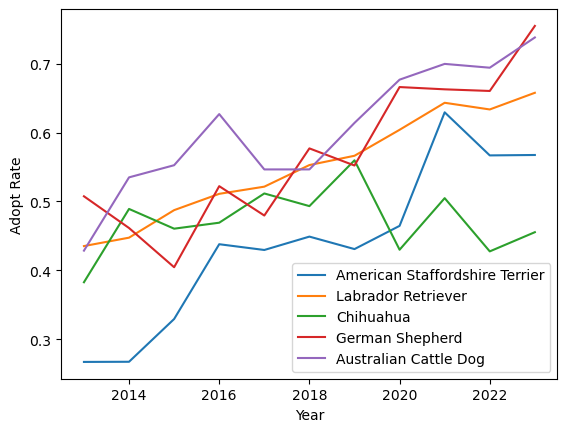

In [411]:
compareBreeds(['American Staffordshire Terrier', 'Labrador Retriever', 'Chihuahua', 'German Shepherd', 
               'Australian Cattle Dog'])

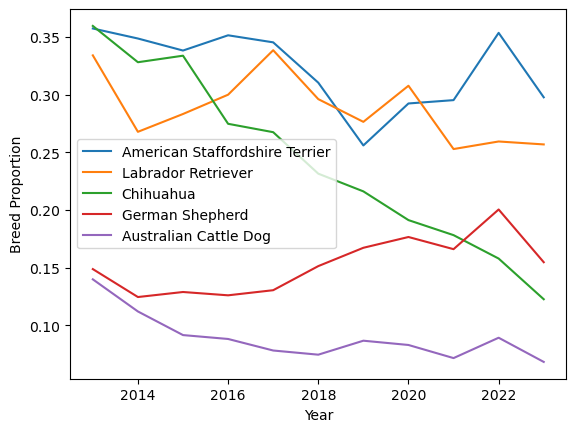

In [429]:
compareBreedProp(['American Staffordshire Terrier', 'Labrador Retriever', 'Chihuahua', 'German Shepherd', 
               'Australian Cattle Dog'])

# Adoption Factors

## Use Pandas & Numpy & Matplotlib to draw diagrams and analyze adoption factors

### Breed

In [359]:
top10_breeds = data['Breed'].value_counts().nlargest(10).reset_index(name='Counts')
top10_breeds

,Breed,Counts
0,American Staffordshire Terrier,13512
1,Labrador Retriever,12109
2,Chihuahua,10222
3,German Shepherd,6336
4,Australian Cattle Dog,3646
5,Dachshund,2448
6,Siberian Husky,1837
7,Boxer,1754
8,Border Collie,1661
9,Poodle,1581


In [360]:
adoption_top10_breeds = adoption['Breed'].value_counts().nlargest(10).reset_index(name='Counts')
adoption_top10_breeds

,Breed,Counts
0,Labrador Retriever,6630
1,American Staffordshire Terrier,5907
2,Chihuahua,4948
3,German Shepherd,3593
4,Australian Cattle Dog,2191
5,Dachshund,1247
6,Siberian Husky,973
7,Border Collie,957
8,Boxer,875
9,American English Coonhound,721


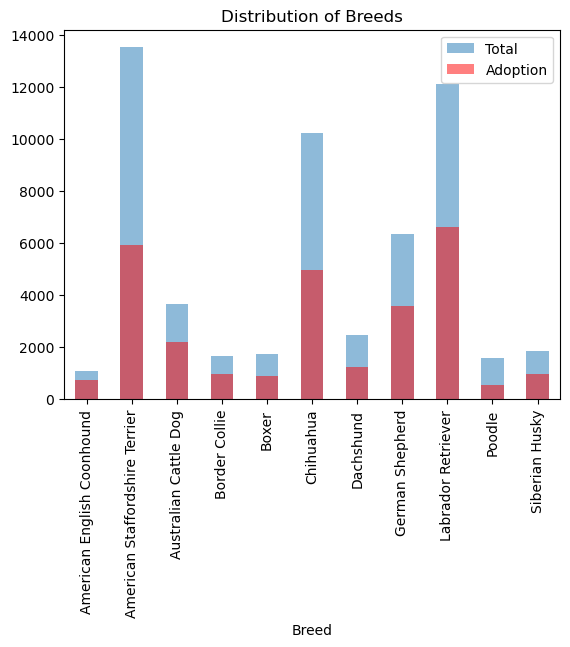

In [439]:
# Total vs Adoption - Breeds distribution
p = ['American Staffordshire Terrier', 'Labrador Retriever', 'Chihuahua', 'German Shepherd', 
    'Australian Cattle Dog', 'Dachshund', 'Siberian Husky', 'Boxer', 'Border Collie', 'Poodle',  
     'American English Coonhound']

top_breeds = data[data['Breed'].isin(p)]['Breed'].value_counts().reset_index()
top_breeds = top_breeds.sort_values(by=['Breed']).reset_index(drop=True)

adoption_top_breeds = adoption[adoption['Breed'].isin(p)]['Breed'].value_counts().reset_index()
adoption_top_breeds = adoption_top_breeds.sort_values(by=['Breed']).reset_index(drop=True)

ax = top_breeds.plot(x='Breed', y='count', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_top_breeds.plot(ax=ax, x='Breed', y='count', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)

plt.title('Distribution of Breeds')
plt.show()

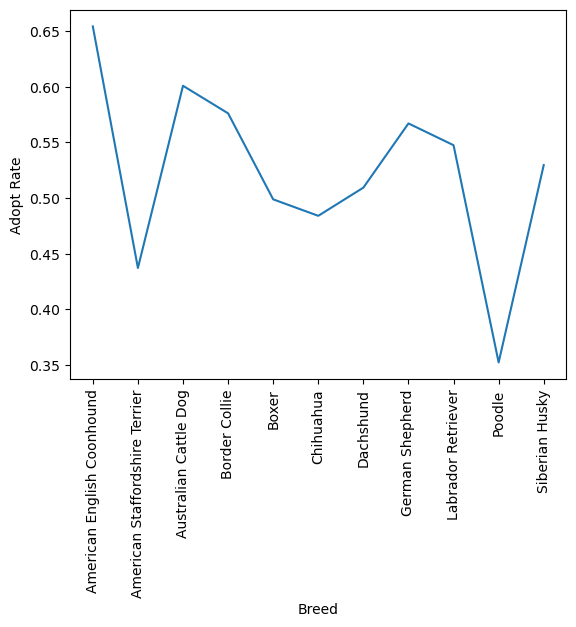

In [440]:
# Adoption rate
top_breeds['Adopt-Rate'] = adoption_top_breeds['count'] / top_breeds['count']

fig, ax = plt.subplots()
ax.plot(top_breeds['Breed'], top_breeds['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Breed')
plt.ylabel('Adopt Rate')
plt.show()

### Category

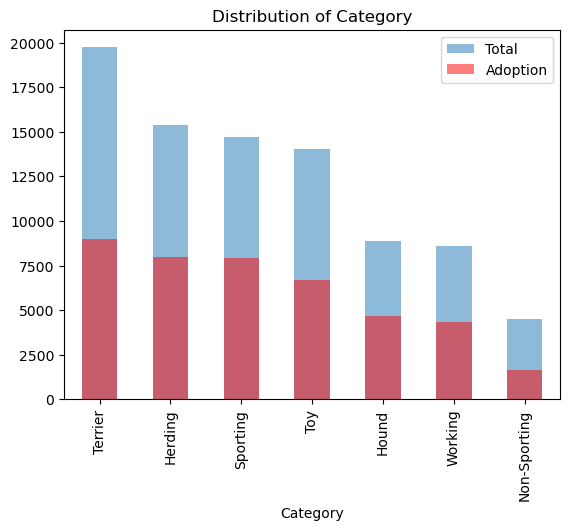

In [441]:
# Total vs Adoption - Category distribution

ax = data['Category'].value_counts().plot(y='count', kind='bar', legend=True, label='Total', alpha=0.5)
adoption['Category'].value_counts().plot(ax=ax, y='count', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Category')
plt.show()

### Gender

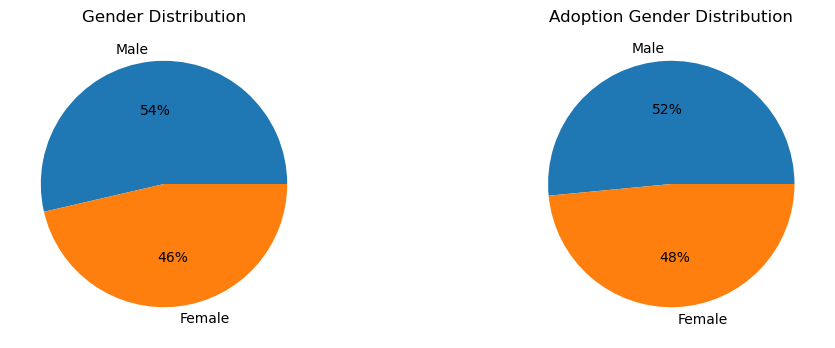

In [219]:
# Total vs Adoption - Gender distribution

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].set_title("Gender Distribution", size=12)
axes[1].set_title("Adoption Gender Distribution", size=12)
axes[0].pie(data['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%.0f%%')
axes[1].pie(adoption['Gender'].value_counts(), labels=['Male', 'Female'], autopct='%.0f%%')
plt.show()

### Age

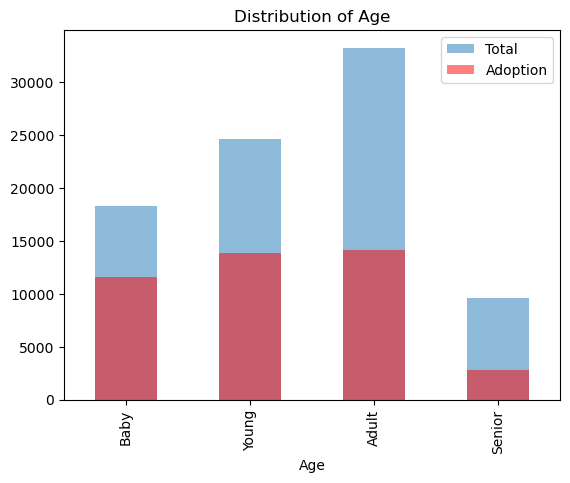

In [442]:
# Total vs Adoption - Age distribution

age = data['Age'].value_counts().reset_index(name='Counts')
adoption_age = adoption['Age'].value_counts().reset_index(name='Counts')

# Sort from baby to senior
a_labels = ['Baby','Young','Adult','Senior']
a_orders = [0,1,2,3]
a_map = dict(zip(a_labels, a_orders))
age['Order'] = age['Age'].map(a_map)
adoption_age['Order'] = adoption_age['Age'].map(a_map)
age.sort_values(by=['Order'], inplace=True)
adoption_age.sort_values(by=['Order'], inplace=True)
# plot
ax = age.plot(x='Age', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_age.plot(ax=ax, x='Age', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Age')
plt.show()

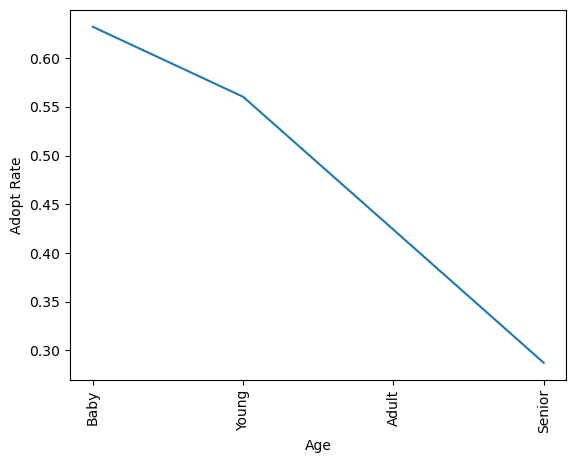

In [415]:
# Adoption rate
age['Adopt-Rate'] = adoption_age['Counts'] / age['Counts']

fig, ax = plt.subplots()
ax.plot(age['Age'], age['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Age')
plt.ylabel('Adopt Rate')
plt.show()

### Color

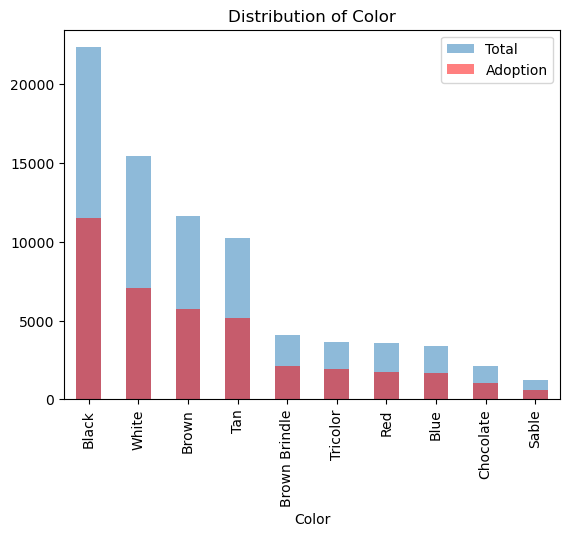

In [443]:
# Total vs Adoption - Color distribution

top10_color = data['Color'].value_counts().nlargest(10).reset_index(name='Counts')
adoption_top10_color = adoption['Color'].value_counts().nlargest(10).reset_index(name='Counts')

ax = top10_color.plot(x='Color', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_top10_color.plot(ax=ax, x='Color', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Color')
plt.show()

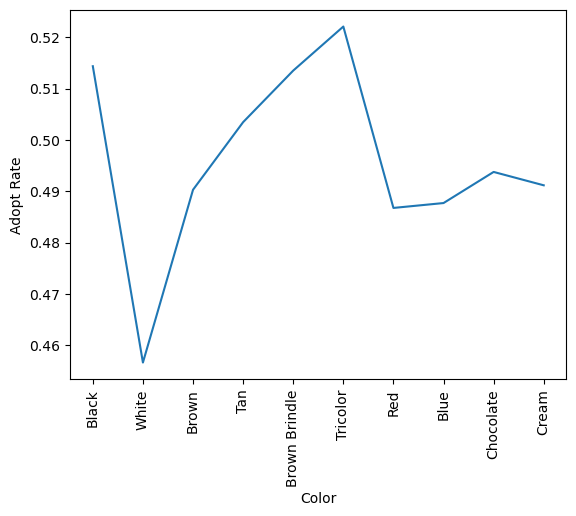

In [416]:
# Adoption rate
top10_color['Adopt-Rate'] = adoption_top10_color['Counts'] / top10_color['Counts']

fig, ax = plt.subplots()
ax.plot(top10_color['Color'], top10_color['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Color')
plt.ylabel('Adopt Rate')
plt.show()

### Intelligence

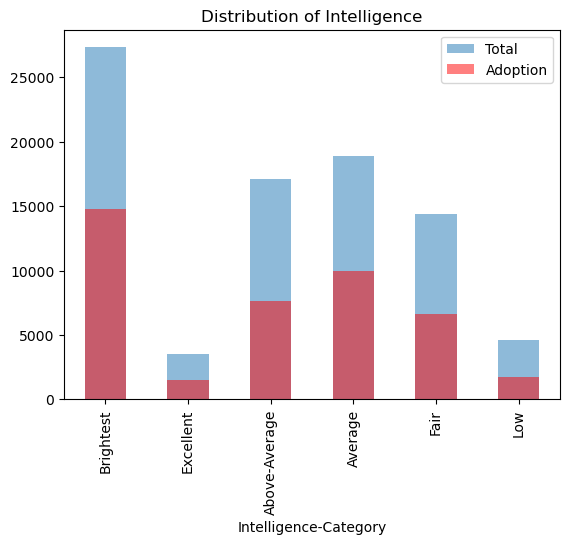

In [447]:
# Total vs Adoption - Intellogence distribution

intell = data['Intelligence-Category'].value_counts().reset_index(name='Counts')
adoption_intell = adoption['Intelligence-Category'].value_counts().reset_index(name='Counts')

# Sort from brightest to low
i_labels = ['Brightest','Excellent','Above-Average','Average','Fair','Low' ]
i_orders = [0,1,2,3,4,5]
i_map = dict(zip(i_labels, i_orders))
intell['Order'] = intell['Intelligence-Category'].map(i_map)
adoption_intell['Order'] = adoption_intell['Intelligence-Category'].map(i_map)
intell.sort_values(by=['Order'], inplace=True)
adoption_intell.sort_values(by=['Order'], inplace=True)
# plot
ax = intell.plot(x='Intelligence-Category', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_intell.plot(ax=ax, x='Intelligence-Category', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Intelligence')
plt.show()

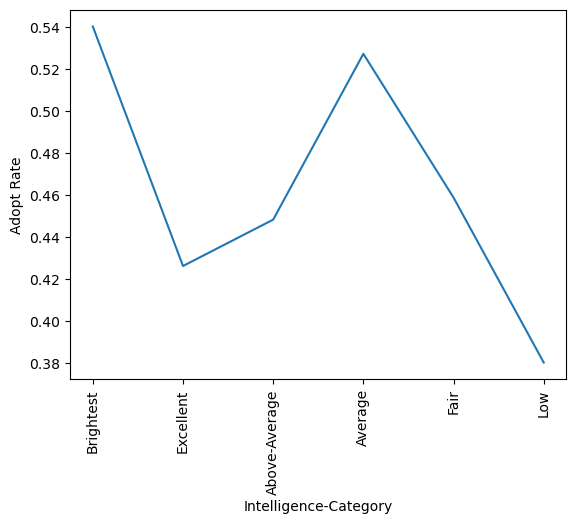

In [417]:
# Adoption rate
intell['Adopt-Rate'] = adoption_intell['Counts'] / intell['Counts']

fig, ax = plt.subplots()
ax.plot(intell['Intelligence-Category'], intell['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Intelligence-Category')
plt.ylabel('Adopt Rate')
plt.show()

### Size

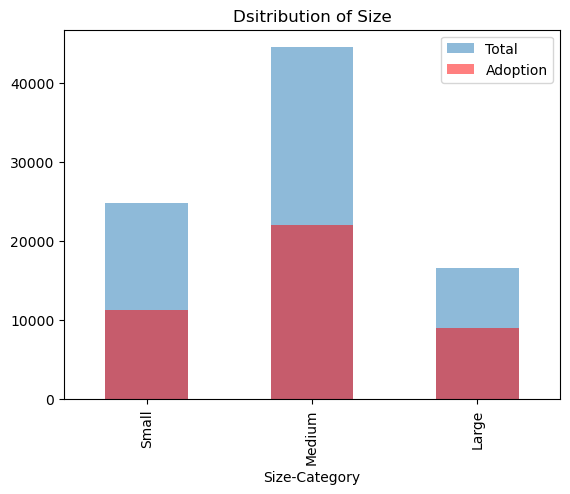

In [448]:
# Total vs Adoption - Size distribution

size = data['Size-Category'].value_counts().reset_index(name='Counts')
adoption_size = adoption['Size-Category'].value_counts().reset_index(name='Counts')

# Sort from samll to large
s_labels = ['Small','Medium','Large']
s_orders = [0,1,2]
s_map = dict(zip(s_labels, s_orders))
size['Order'] = size['Size-Category'].map(s_map)
adoption_size['Order'] = adoption_size['Size-Category'].map(s_map)
size.sort_values(by=['Order'], inplace=True)
adoption_size.sort_values(by=['Order'], inplace=True)
# plot

ax = size.plot(x='Size-Category', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_size.plot(ax=ax, x='Size-Category', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Dsitribution of Size')
plt.show()

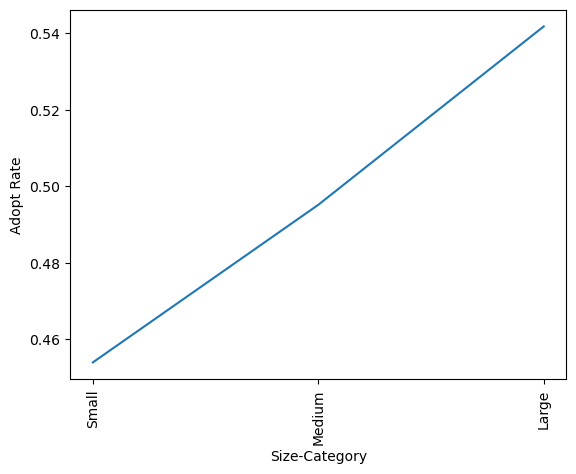

In [418]:
# Adoption rate
size['Adopt-Rate'] = adoption_size['Counts'] / size['Counts']

fig, ax = plt.subplots()
ax.plot(size['Size-Category'], size['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Size-Category')
plt.ylabel('Adopt Rate')
plt.show()

### Cost

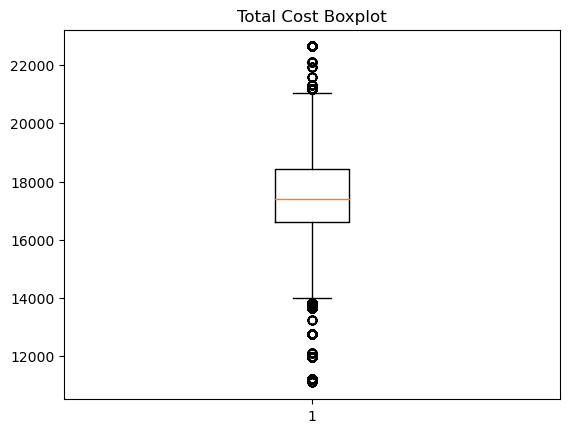

In [452]:
# Total cost range

plt.boxplot(data['Total-Cost($)'])
plt.title('Total Cost Boxplot')
plt.show()

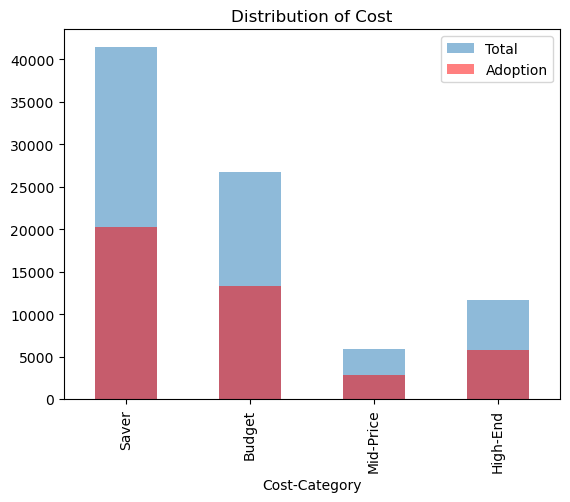

In [449]:
# Total vs Adoption - Cost distribution

cost = data['Cost-Category'].value_counts().reset_index(name='Counts')
adoption_cost = adoption['Cost-Category'].value_counts().reset_index(name='Counts')

# Sort from saver to high-end
c_labels = ['Saver','Budget','Mid-Price','High-End']
c_orders = [0,1,2,3]
c_map = dict(zip(c_labels, c_orders))
cost['Order'] = cost['Cost-Category'].map(c_map)
adoption_cost['Order'] = adoption_cost['Cost-Category'].map(c_map)
cost.sort_values(by=['Order'], inplace=True)
adoption_cost.sort_values(by=['Order'], inplace=True)
# plot

ax = cost.plot(x='Cost-Category', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_cost.plot(ax=ax, x='Cost-Category', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Cost')
plt.show()

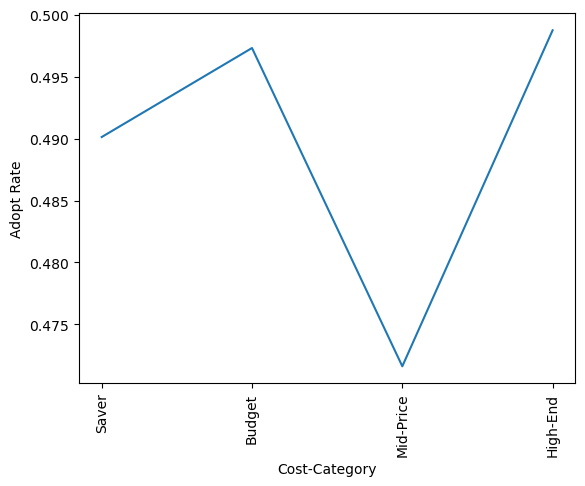

In [419]:
# Adoption rate
cost['Adopt-Rate'] = adoption_cost['Counts'] / cost['Counts']

fig, ax = plt.subplots()
ax.plot(cost['Cost-Category'], cost['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Cost-Category')
plt.ylabel('Adopt Rate')
plt.show()

### Intake-Type

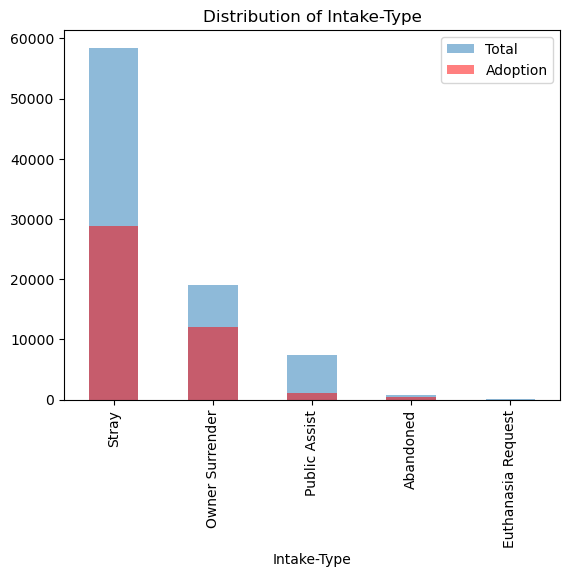

In [453]:
# Total vs Adoption - Intake-Type distribution
intake = data['Intake-Type'].value_counts().reset_index(name='Counts')
adoption_intake = adoption['Intake-Type'].value_counts().reset_index(name='Counts')

ax = intake.plot(x='Intake-Type', y='Counts', kind='bar', legend=True, label='Total', alpha=0.5)
adoption_intake.plot(ax=ax, x='Intake-Type', y='Counts', kind='bar', legend=True, color='red', label='Adoption', alpha=0.5)
plt.title('Distribution of Intake-Type')
plt.show()

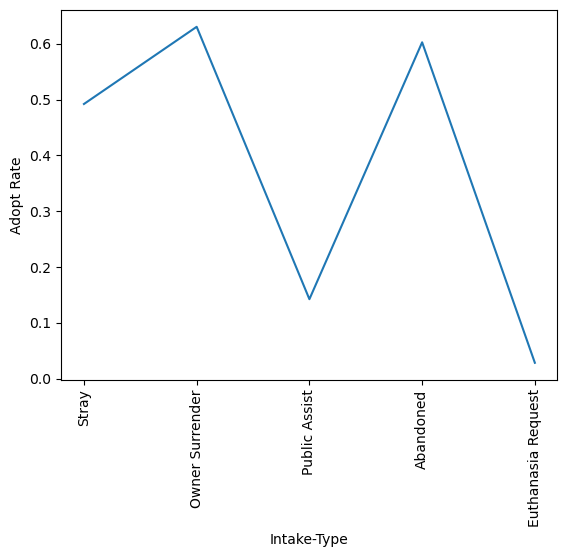

In [420]:
# Adoption rate
intake['Adopt-Rate'] = adoption_intake['Counts'] / intake['Counts']

fig, ax = plt.subplots()
ax.plot(intake['Intake-Type'], intake['Adopt-Rate'])
plt.xticks(rotation='vertical')
plt.xlabel('Intake-Type')
plt.ylabel('Adopt Rate')
plt.show()

## Use Apriori algorithm to compute and extract association rules to analyse adoption factors

In [232]:
# (c) 2016 Everaldo Aguiar & Reid Johnson
#
# Modified from:
# Marcel Caraciolo (https://gist.github.com/marcelcaraciolo/1423287)
#
# Functions to compute and extract association rules from a given frequent itemset 
# generated by the Apriori algorithm.
#
# The Apriori algorithm is defined by Agrawal and Srikant in:
# Fast algorithms for mining association rules
# Proc. 20th int. conf. very large data bases, VLDB. Vol. 1215. 1994

def load_dataset(filename):
    '''Loads an example of market basket transactions from a provided csv file.

    Returns: A list (database) of lists (transactions). Each element of a transaction is 
    an item.
    '''

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data, dtype=object)
        
    return data_array

def apriori(dataset, min_support=0.5, verbose=False):
    """Implements the Apriori algorithm.

    The Apriori algorithm will iteratively generate new candidate 
    k-itemsets using the frequent (k-1)-itemsets found in the previous 
    iteration.

    Parameters
    ----------
    dataset : list
        The dataset (a list of transactions) from which to generate 
        candidate itemsets.

    min_support : float
        The minimum support threshold. Defaults to 0.5.

    Returns
    -------
    F : list
        The list of frequent itemsets.

    support_data : dict
        The support data for all candidate itemsets.

    References
    ----------
    .. [1] R. Agrawal, R. Srikant, "Fast Algorithms for Mining Association 
           Rules", 1994.

    """
    C1 = create_candidates(dataset)
    D = list(map(set, dataset))
    F1, support_data = support_prune(D, C1, min_support, verbose=False) # prune candidate 1-itemsets
    F = [F1] # list of frequent itemsets; initialized to frequent 1-itemsets
    k = 2 # the itemset cardinality
    while (len(F[k - 2]) > 0):
        Ck = apriori_gen(F[k-2], k) # generate candidate itemsets
        Fk, supK = support_prune(D, Ck, min_support) # prune candidate itemsets
        support_data.update(supK) # update the support counts to reflect pruning
        F.append(Fk) # add the pruned candidate itemsets to the list of frequent itemsets
        k += 1

    if verbose:
        # Print a list of all the frequent itemsets.
        for kset in F:
            for item in kset:
                print("" \
                    + "{" \
                    + "".join(str(i) + ", " for i in iter(item)).rstrip(', ') \
                    + "}" \
                    + ":  sup = " + str(round(support_data[item], 3)))

    return F, support_data

def create_candidates(dataset, verbose=False):
    """Creates a list of candidate 1-itemsets from a list of transactions.

    Parameters
    ----------
    dataset : list
        The dataset (a list of transactions) from which to generate candidate 
        itemsets.

    Returns
    -------
    The list of candidate itemsets (c1) passed as a frozenset (a set that is 
    immutable and hashable).
    """
    c1 = [] # list of all items in the database of transactions
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()

    if verbose:
        # Print a list of all the candidate items.
        print("" \
            + "{" \
            + "".join(str(i[0]) + ", " for i in iter(c1)).rstrip(', ') \
            + "}")

    # Map c1 to a frozenset because it will be the key of a dictionary.
    return list(map(frozenset, c1))

def support_prune(dataset, candidates, min_support, verbose=False):
    """Returns all candidate itemsets that meet a minimum support threshold.

    By the apriori principle, if an itemset is frequent, then all of its 
    subsets must also be frequent. As a result, we can perform support-based 
    pruning to systematically control the exponential growth of candidate 
    itemsets. Thus, itemsets that do not meet the minimum support level are 
    pruned from the input list of itemsets (dataset).

    Parameters
    ----------
    dataset : list
        The dataset (a list of transactions) from which to generate candidate 
        itemsets.

    candidates : frozenset
        The list of candidate itemsets.

    min_support : float
        The minimum support threshold.

    Returns
    -------
    retlist : list
        The list of frequent itemsets.

    support_data : dict
        The support data for all candidate itemsets.
    """
    sscnt = {} # set for support counts
    for tid in dataset:
        for can in candidates:
            if can.issubset(tid):
                sscnt.setdefault(can, 0)
                sscnt[can] += 1

    num_items = float(len(dataset)) # total number of transactions in the dataset
    retlist = [] # array for unpruned itemsets
    support_data = {} # set for support data for corresponding itemsets
    for key in sscnt:
        # Calculate the support of itemset key.
        support = sscnt[key] / num_items
        if support >= min_support:
            retlist.insert(0, key)
        support_data[key] = support

    # Print a list of the pruned itemsets.
    if verbose:
        for kset in retlist:
            for item in kset:
                print("{" + str(item) + "}")
        print("")
        for key in sscnt:
            print("" \
                + "{" \
                + "".join([str(i) + ", " for i in iter(key)]).rstrip(', ') \
                + "}" \
                + ":  sup = " + str(support_data[key]))

    return retlist, support_data

def apriori_gen(freq_sets, k):
    """Generates candidate itemsets (via the F_k-1 x F_k-1 method).

    This operation generates new candidate k-itemsets based on the frequent 
    (k-1)-itemsets found in the previous iteration. The candidate generation 
    procedure merges a pair of frequent (k-1)-itemsets only if their first k-2 
    items are identical.

    Parameters
    ----------
    freq_sets : list
        The list of frequent (k-1)-itemsets.

    k : integer
        The cardinality of the current itemsets being evaluated.

    Returns
    -------
    retlist : list
        The list of merged frequent itemsets.
    """
    retList = [] # list of merged frequent itemsets
    lenLk = len(freq_sets) # number of frequent itemsets
    for i in range(lenLk):
        for j in range(i+1, lenLk):
            a=list(freq_sets[i])
            b=list(freq_sets[j])
            a.sort()
            b.sort()
            F1 = a[:k-2] # first k-2 items of freq_sets[i]
            F2 = b[:k-2] # first k-2 items of freq_sets[j]

            if F1 == F2: # if the first k-2 items are identical
                # Merge the frequent itemsets.
                retList.append(freq_sets[i] | freq_sets[j])

    return retList

def rules_from_conseq(freq_set, H, support_data, rules, min_confidence=0.5, verbose=False):
    """Generates a set of candidate rules.

    Parameters
    ----------
    freq_set : frozenset
        The complete list of frequent itemsets.

    H : list
        A list of frequent itemsets (of a particular length).

    support_data : dict
        The support data for all candidate itemsets.

    rules : list
        A potentially incomplete set of candidate rules above the minimum 
        confidence threshold.

    min_confidence : float
        The minimum confidence threshold. Defaults to 0.5.
    """
    m = len(H[0])
    if m == 1:
        Hmp1 = calc_confidence(freq_set, H, support_data, rules, min_confidence, verbose)
    if (len(freq_set) > (m+1)):
        Hmp1 = apriori_gen(H, m+1) # generate candidate itemsets
        Hmp1 = calc_confidence(freq_set, Hmp1, support_data, rules, min_confidence, verbose)
        if len(Hmp1) > 1:
            # If there are candidate rules above the minimum confidence 
            # threshold, recurse on the list of these candidate rules.
            rules_from_conseq(freq_set, Hmp1, support_data, rules, min_confidence, verbose)

def calc_confidence(freq_set, H, support_data, rules, min_confidence=0.5, verbose=False):
    """Evaluates the generated rules.

    One measurement for quantifying the goodness of association rules is 
    confidence. The confidence for a rule 'P implies H' (P -> H) is defined as 
    the support for P and H divided by the support for P 
    (support (P|H) / support(P)), where the | symbol denotes the set union 
    (thus P|H means all the items in set P or in set H).

    To calculate the confidence, we iterate through the frequent itemsets and 
    associated support data. For each frequent itemset, we divide the support 
    of the itemset by the support of the antecedent (left-hand-side of the 
    rule).

    Parameters
    ----------
    freq_set : frozenset
        The complete list of frequent itemsets.

    H : list
        A list of frequent itemsets (of a particular length).

    min_support : float
        The minimum support threshold.

    rules : list
        A potentially incomplete set of candidate rules above the minimum 
        confidence threshold.

    min_confidence : float
        The minimum confidence threshold. Defaults to 0.5.

    Returns
    -------
    pruned_H : list
        The list of candidate rules above the minimum confidence threshold.
    """
    pruned_H = [] # list of candidate rules above the minimum confidence threshold
    for conseq in H: # iterate over the frequent itemsets
        conf = support_data[freq_set] / support_data[freq_set - conseq]
        if conf >= min_confidence:
            rules.append((freq_set - conseq, conseq, conf))
            pruned_H.append(conseq)

            if verbose:
                print("" \
                    + "{" \
                    + "".join([str(i) + ", " for i in iter(freq_set-conseq)]).rstrip(', ') \
                    + "}" \
                    + " ---> " \
                    + "{" \
                    + "".join([str(i) + ", " for i in iter(conseq)]).rstrip(', ') \
                    + "}" \
                    + ":  conf = " + str(round(conf, 3)) \
                    + ", sup = " + str(round(support_data[freq_set], 3)))

    return pruned_H

def generate_rules(F, support_data, min_confidence=0.5, verbose=True):
    """Generates a set of candidate rules from a list of frequent itemsets.

    For each frequent itemset, we calculate the confidence of using a
    particular item as the rule consequent (right-hand-side of the rule). By 
    testing and merging the remaining rules, we recursively create a list of 
    pruned rules.

    Parameters
    ----------
    F : list
        A list of frequent itemsets.

    support_data : dict
        The corresponding support data for the frequent itemsets (L).

    min_confidence : float
        The minimum confidence threshold. Defaults to 0.5.

    Returns
    -------
    rules : list
        The list of candidate rules above the minimum confidence threshold.
    """
    rules = []
    for i in range(1, len(F)):
        for freq_set in F[i]:
            H1 = [frozenset([itemset]) for itemset in freq_set]
            if (i > 1):
                rules_from_conseq(freq_set, H1, support_data, rules, min_confidence, verbose)
            else:
                calc_confidence(freq_set, H1, support_data, rules, min_confidence, verbose)

    return rules

### Load features data

In [233]:
# laod features dataset
dataset = load_dataset('features.csv')
# Change all features to a set format
D = list(map(set, dataset))

In [234]:
dataset.shape

(85796, 10)

In [235]:
D[0]

{'Above-Average',
 'Adult',
 'Budget',
 'False',
 'Large',
 'Male',
 'Public Assist',
 'Spinone Italiano',
 'Sporting',
 'Yellow'}

In [251]:
# Generate all the frequent itemsets using the Apriori algorithm.
F, support_data = apriori(dataset, min_support=0.1, verbose=True)

{Baby}:  sup = 0.213
{Young}:  sup = 0.287
{Chihuahua}:  sup = 0.119
{High-End}:  sup = 0.136
{American Staffordshire Terrier}:  sup = 0.157
{Terrier}:  sup = 0.23
{Toy}:  sup = 0.179
{Working}:  sup = 0.103
{Tan}:  sup = 0.119
{True}:  sup = 0.492
{Owner Surrender}:  sup = 0.221
{Average}:  sup = 0.22
{White}:  sup = 0.18
{Fair}:  sup = 0.168
{Medium}:  sup = 0.518
{Labrador Retriever}:  sup = 0.141
{Female}:  sup = 0.464
{Black}:  sup = 0.26
{Small}:  sup = 0.289
{Saver}:  sup = 0.483
{Herding}:  sup = 0.164
{Brown}:  sup = 0.136
{Brightest}:  sup = 0.318
{Stray}:  sup = 0.681
{Senior}:  sup = 0.112
{Sporting}:  sup = 0.171
{Male}:  sup = 0.536
{Large}:  sup = 0.193
{False}:  sup = 0.508
{Budget}:  sup = 0.312
{Adult}:  sup = 0.388
{Above-Average}:  sup = 0.199
{Baby, Stray}:  sup = 0.156
{Baby, Male}:  sup = 0.102
{Baby, True}:  sup = 0.135
{Baby, Female}:  sup = 0.111
{Baby, Medium}:  sup = 0.113
{Young, Male}:  sup = 0.155
{Young, True}:  sup = 0.161
{Young, Stray}:  sup = 0.203
{

In [252]:
# Generate the association rules from a list of frequent itemsets.
H = generate_rules(F, support_data, min_confidence=0.2, verbose=True)

{Stray} ---> {Baby}:  conf = 0.229, sup = 0.156
{Baby} ---> {Stray}:  conf = 0.732, sup = 0.156
{Baby} ---> {Male}:  conf = 0.479, sup = 0.102
{True} ---> {Baby}:  conf = 0.274, sup = 0.135
{Baby} ---> {True}:  conf = 0.632, sup = 0.135
{Female} ---> {Baby}:  conf = 0.24, sup = 0.111
{Baby} ---> {Female}:  conf = 0.521, sup = 0.111
{Medium} ---> {Baby}:  conf = 0.218, sup = 0.113
{Baby} ---> {Medium}:  conf = 0.53, sup = 0.113
{Male} ---> {Young}:  conf = 0.289, sup = 0.155
{Young} ---> {Male}:  conf = 0.539, sup = 0.155
{True} ---> {Young}:  conf = 0.327, sup = 0.161
{Young} ---> {True}:  conf = 0.56, sup = 0.161
{Stray} ---> {Young}:  conf = 0.299, sup = 0.203
{Young} ---> {Stray}:  conf = 0.708, sup = 0.203
{False} ---> {Young}:  conf = 0.249, sup = 0.126
{Young} ---> {False}:  conf = 0.44, sup = 0.126
{Saver} ---> {Young}:  conf = 0.293, sup = 0.141
{Young} ---> {Saver}:  conf = 0.492, sup = 0.141
{Female} ---> {Young}:  conf = 0.286, sup = 0.133
{Young} ---> {Female}:  conf = 0.46

In [253]:
df = pd.DataFrame(H, columns =['From', 'To', 'Confidence'])
df

,From,To,Confidence
0,(Stray),(Baby),0.229155
1,(Baby),(Stray),0.732207
2,(Baby),(Male),0.478627
3,(True),(Baby),0.273808
4,(Baby),(True),0.632120
...,...,...,...
1555,"(American Staffordshire Terrier, Stray)","(Above-Average, Terrier, Saver, Medium)",1.000000
1556,(Above-Average),"(American Staffordshire Terrier, Stray, Terrie...",0.515702
1557,(Saver),"(American Staffordshire Terrier, Stray, Terrie...",0.212321
1558,(Terrier),"(American Staffordshire Terrier, Stray, Saver,...",0.446145


In [254]:
# calculate interest factors
interest_factors = np.zeros(len(H))
support = np.zeros(len(H))
for i in range(len(H)):
    a = support_data[H[i][0]]
    b = support_data[H[i][1]]
    c = support_data[H[i][0].union(H[i][1])]
    support[i] = round(c, 3)
    interest_factors[i] = round(c / (a * b), 3)
df['Support'] = support
df['Interest-Factor'] = interest_factors

In [255]:
# Filter the rules that result in True(IsAdopted)
df = df[df['To']=={'True'}]
df

,From,To,Confidence,Support,Interest-Factor
4,(Baby),(True),0.632120,0.135,1.284
12,(Young),(True),0.560307,0.161,1.138
24,(Adult),(True),0.423960,0.164,0.861
40,(Terrier),(True),0.454965,0.105,0.924
64,(Large),(True),0.541831,0.104,1.101
66,(Female),(True),0.514601,0.239,1.045
85,(Budget),(True),0.497325,0.155,1.010
87,(Stray),(True),0.492011,0.335,0.999
89,(Brightest),(True),0.540447,0.172,1.098
91,(Medium),(True),0.495178,0.257,1.006


In [259]:
df.sort_values('Support', ascending=False).head(10)

,From,To,Confidence,Support,Interest-Factor
87,(Stray),(True),0.492011,0.335,0.999
91,(Medium),(True),0.495178,0.257,1.006
135,(Male),(True),0.472937,0.254,0.961
66,(Female),(True),0.514601,0.239,1.045
137,(Saver),(True),0.490134,0.237,0.996
543,"(Male, Stray)",(True),0.475964,0.174,0.967
561,"(Stray, Medium)",(True),0.494012,0.173,1.004
89,(Brightest),(True),0.540447,0.172,1.098
24,(Adult),(True),0.423960,0.164,0.861
414,"(Stray, Female)",(True),0.510543,0.161,1.037


In [260]:
df.sort_values('Confidence', ascending=False).head(10)

,From,To,Confidence,Support,Interest-Factor
243,"(Baby, Stray)",(True),0.640761,0.100,1.302
4,(Baby),(True),0.632120,0.135,1.284
145,(Owner Surrender),(True),0.630257,0.140,1.280
12,(Young),(True),0.560307,0.161,1.138
248,"(Young, Stray)",(True),0.558636,0.114,1.135
64,(Large),(True),0.541831,0.104,1.101
567,"(Brightest, Medium)",(True),0.540643,0.123,1.098
89,(Brightest),(True),0.540447,0.172,1.098
573,"(Brightest, Stray)",(True),0.534043,0.117,1.085
143,(Average),(True),0.527434,0.116,1.071


In [261]:
df.sort_values('Interest-Factor', ascending=False).head(10)

,From,To,Confidence,Support,Interest-Factor
243,"(Baby, Stray)",(True),0.640761,0.100,1.302
4,(Baby),(True),0.632120,0.135,1.284
145,(Owner Surrender),(True),0.630257,0.140,1.280
12,(Young),(True),0.560307,0.161,1.138
248,"(Young, Stray)",(True),0.558636,0.114,1.135
64,(Large),(True),0.541831,0.104,1.101
567,"(Brightest, Medium)",(True),0.540643,0.123,1.098
89,(Brightest),(True),0.540447,0.172,1.098
573,"(Brightest, Stray)",(True),0.534043,0.117,1.085
143,(Average),(True),0.527434,0.116,1.071
